# Example 1: Function Fitting

In this example, we will cover how to leverage grid refinement to maximimze KANs' ability to fit functions

intialize model and create dataset

In [22]:
import numpy as np
import torch
from kan import KAN, create_dataset

import matplotlib.pyplot as plt

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

In [13]:
dataset.keys()

dict_keys(['train_input', 'test_input', 'train_label', 'test_label'])

In [14]:
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Train KAN (grid=3)

In [15]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 1.46e-02 | test loss: 1.52e-02 | reg: 2.97e+00 : 100%|██| 20/20 [00:05<00:00,  3.74it/s]


The loss plateaus. we want a more fine-grained KAN!

In [3]:
# initialize a more fine-grained KAN with G=10
model2 = KAN(width=[2,1,1], grid=10, k=3)
# initialize model2 from model
model2.initialize_from_another_model(model, dataset['train_input']);

Train KAN (grid=10)

In [4]:
model2.train(dataset, opt="LBFGS", steps=20);

train loss: 3.10e-04 | test loss: 3.21e-04 | reg: 3.00e+00 : 100%|██| 20/20 [00:03<00:00,  6.45it/s]


The loss becomes lower. This is good! Now we can even iteratively making grids finer.

In [46]:
grids = np.array([5,10,20,50])

train_losses = []
test_losses = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    print()
    print(f"grid={i}")
    print('before training:')
    print(model.act_fun[1].grid, model.act_fun[1].grid.shape)
    results = model.train(dataset, opt="LBFGS", steps=steps, 
                          update_grid = True, 
                          grid_update_num=30,
                          stop_grid_update_step=40)
    print('after training:')
    print(model.act_fun[1].grid, model.act_fun[1].grid.shape)
    print()
    train_losses += results['train_loss']
    test_losses += results['test_loss']
    


grid=0
before training:
Parameter containing:
tensor([[-1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000]]) torch.Size([1, 6])


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

train loss: 6.10e-03 | test loss: 6.26e-03 | reg: 2.99e+00 : 100%|██| 50/50 [00:10<00:00,  4.83it/s]


after training:
Parameter containing:
tensor([[-1.0000, -0.6000, -0.2000,  0.2000,  0.6000,  1.0000]]) torch.Size([1, 6])


grid=1
before training:
Parameter containing:
tensor([[-1.0000, -0.8000, -0.6000, -0.4000, -0.2000,  0.0000,  0.2000,  0.4000,
          0.6000,  0.8000,  1.0000]]) torch.Size([1, 11])


train loss: 8.30e-04 | test loss: 7.88e-04 | reg: 2.96e+00 : 100%|██| 50/50 [00:11<00:00,  4.36it/s]


after training:
Parameter containing:
tensor([[-1.0000, -0.8000, -0.6000, -0.4000, -0.2000,  0.0000,  0.2000,  0.4000,
          0.6000,  0.8000,  1.0000]]) torch.Size([1, 11])


grid=2
before training:
Parameter containing:
tensor([[-1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
         -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
          0.6000,  0.7000,  0.8000,  0.9000,  1.0000]]) torch.Size([1, 21])


train loss: 9.82e-04 | test loss: 1.94e-03 | reg: 2.92e+00 : 100%|██| 50/50 [00:15<00:00,  3.16it/s]


after training:
Parameter containing:
tensor([[-1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
         -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
          0.6000,  0.7000,  0.8000,  0.9000,  1.0000]]) torch.Size([1, 21])


grid=3
before training:
Parameter containing:
tensor([[-1.0000, -0.9600, -0.9200, -0.8800, -0.8400, -0.8000, -0.7600, -0.7200,
         -0.6800, -0.6400, -0.6000, -0.5600, -0.5200, -0.4800, -0.4400, -0.4000,
         -0.3600, -0.3200, -0.2800, -0.2400, -0.2000, -0.1600, -0.1200, -0.0800,
         -0.0400,  0.0000,  0.0400,  0.0800,  0.1200,  0.1600,  0.2000,  0.2400,
          0.2800,  0.3200,  0.3600,  0.4000,  0.4400,  0.4800,  0.5200,  0.5600,
          0.6000,  0.6400,  0.6800,  0.7200,  0.7600,  0.8000,  0.8400,  0.8800,
          0.9200,  0.9600,  1.0000]]) torch.Size([1, 51])


train loss: 1.85e-03 | test loss: 5.65e-03 | reg: 2.90e+00 : 100%|██| 50/50 [00:17<00:00,  2.88it/s]

after training:
Parameter containing:
tensor([[-1.0000, -0.9600, -0.9200, -0.8800, -0.8400, -0.8000, -0.7600, -0.7200,
         -0.6800, -0.6400, -0.6000, -0.5600, -0.5200, -0.4800, -0.4400, -0.4000,
         -0.3600, -0.3200, -0.2800, -0.2400, -0.2000, -0.1600, -0.1200, -0.0800,
         -0.0400,  0.0000,  0.0400,  0.0800,  0.1200,  0.1600,  0.2000,  0.2400,
          0.2800,  0.3200,  0.3600,  0.4000,  0.4400,  0.4800,  0.5200,  0.5600,
          0.6000,  0.6400,  0.6800,  0.7200,  0.7600,  0.8000,  0.8400,  0.8800,
          0.9200,  0.9600,  1.0000]]) torch.Size([1, 51])



Training dynamics of losses display staircase structures (loss suddenly drops after grid refinement)

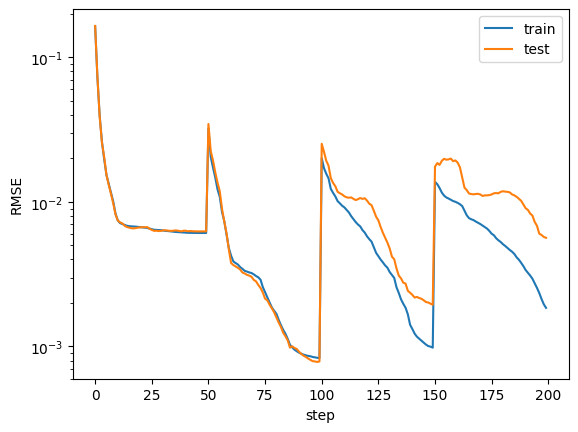

In [47]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

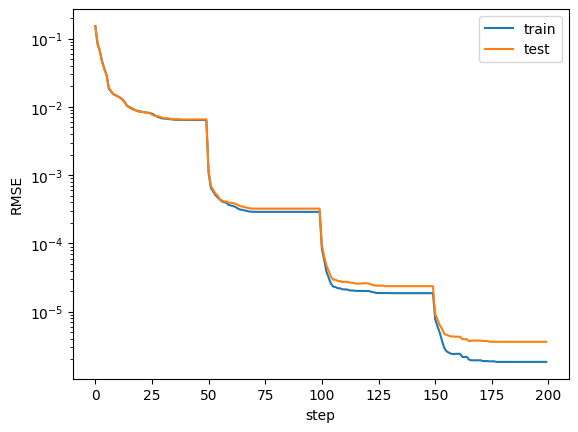

In [28]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Neural scaling laws

Text(0, 0.5, 'RMSE')

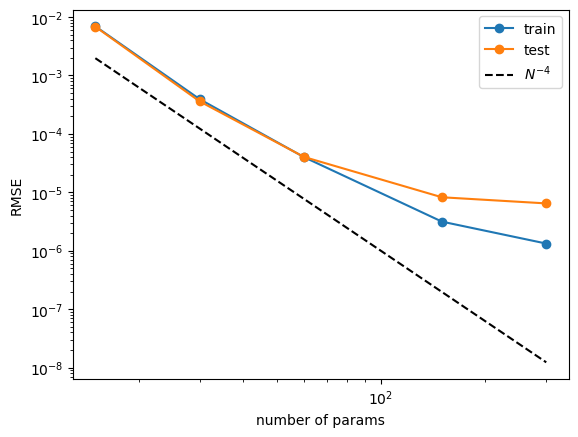

In [7]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')